# SECOND POINT

We will to improve our results by building different CNN with different characteristics. We perform data augmentation in order to have more data to train my network

In [1]:
import os
import glob
import scipy
import cv2 as cv2
import numpy as np
import keras as ks
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn
import pandas as pd

from tensorflow.keras import optimizers, initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from keras.layers import BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import import_ipynb
import dataSetUtility as dsu
import plottingUtility as pltu

importing Jupyter notebook from dataSetUtility.ipynb
importing Jupyter notebook from plottingUtility.ipynb


# DATA AUGMENTATION

To improve the results we try to increase the number of data following a transformation from left to right. To do this we use a method from the dataSetUtility.

In [2]:
#path to the directories
pathTrain=r'C:\Users\39320\Desktop\tesi\Computer-Vision-2020-main\ImageSet\train'
pathTest=r'C:\Users\39320\Desktop\tesi\Computer-Vision-2020-main\ImageSet\test'

labels = [os.path.basename(i) for i in glob.glob(pathTrain + '/*', recursive=True)]
numberOfClasses = len(labels)
print("Class number: ", numberOfClasses)
print("Class names: ", labels)

Class number:  12
Class names:  ['171', '178_FORSE', '371', '385_FORSE', '43', '438', '619', '655', '659', '72', '96', 'Grandi']


In [3]:
xTrainAug, yTrainAug = dsu.dataAugmentation(pathTrain, labels)
xTest, yTest = dsu.loadImages(pathTest, labels)
print("Train len: ", len(xTrainAug))
print("Train label len: ", len(yTrainAug))
print("---------------------------------")
print("Test len: ", len(xTest))
print("Test label len: ", len(yTest))

Train len:  3002
Train label len:  3002
---------------------------------
Test len:  309
Test label len:  309


In [4]:
yTrainCategorical = to_categorical(yTrainAug)
yTestCategorical = to_categorical(yTest)

In [5]:
xTrain, xValidation, yTrain, yValidation = train_test_split(xTrainAug, yTrainCategorical, train_size=0.85, random_state=275)
print('len Train Set: ',len(xTrain))
print('len Validation Set: ',len(xValidation))
print('len Test Set: ',len(xTest))

len Train Set:  2551
len Validation Set:  451
len Test Set:  309


# CNN MODEL

Initially we try to apply the data augmentation to the cnn of point one

In [6]:
sgd = tf.keras.optimizers.SGD(momentum=0.9,nesterov=True)
norm = ks.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
baseModel = Sequential([
    #first convolutional layer
    Conv2D(8, 3,strides=1, padding='valid', activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #second convolutional layer
    Conv2D(16, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #third convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses, activation='relu',kernel_initializer=norm, bias_initializer='zeros'),
    Dense(numberOfClasses, activation='softmax')
])

baseModel.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

In [7]:
baseModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 12)                5

In [8]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

history=baseModel.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Epoch 1/100
80/80 [==============================] - 3s 27ms/step - loss: 2.0991 - accuracy: 0.2368 - val_loss: 1.8992 - val_accuracy: 0.3038
Epoch 2/100
80/80 [==============================] - 2s 25ms/step - loss: 1.6468 - accuracy: 0.4014 - val_loss: 1.4437 - val_accuracy: 0.5078
Epoch 3/100
80/80 [==============================] - 2s 25ms/step - loss: 1.2851 - accuracy: 0.5621 - val_loss: 1.1244 - val_accuracy: 0.6674
Epoch 4/100
80/80 [==============================] - 2s 28ms/step - loss: 1.0295 - accuracy: 0.6789 - val_loss: 0.8527 - val_accuracy: 0.7650
Epoch 5/100
80/80 [==============================] - 2s 26ms/step - loss: 0.7884 - accuracy: 0.7448 - val_loss: 0.7410 - val_accuracy: 0.7738
Epoch 6/100
80/80 [==============================] - 2s 26ms/step - loss: 0.5944 - accuracy: 0.8107 - val_loss: 0.6444 - val_accuracy: 0.8093
Epoch 7/100
80/80 [==============================] - 2s 27ms/step - loss: 0.5059 - accuracy: 0.8432 - val_loss: 0.5969 - val_accuracy: 0.8182
Epoch 

In [9]:
baseModel.evaluate(xTest, yTestCategorical)

prediction = baseModel.predict(xTest) 
yPred = dsu.predictClass(prediction)
cm=confusion_matrix(yTest, yPred)

10/10 [==============================] - 0s 8ms/step - loss: 0.8002 - accuracy: 0.8641


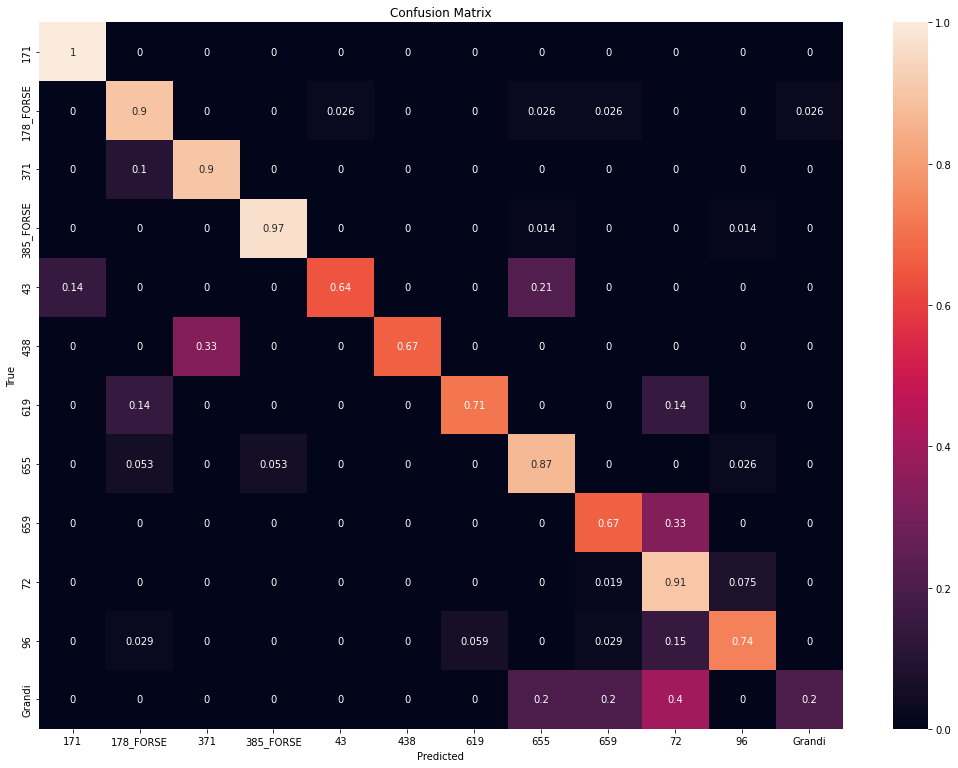

In [10]:
pltu.plotConfusionMatrix(cm, labels, "confusion_matrix_augmentation", "images_point_two/")

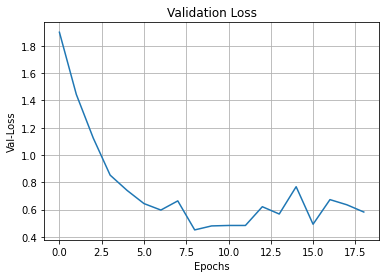

In [11]:
pltu.validationLoss(history, "images_point_two", "validation_loss_1")

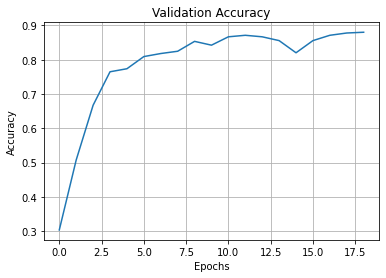

In [12]:
pltu.validationAccuracy(history, "images_point_two", "validation_acc_1")

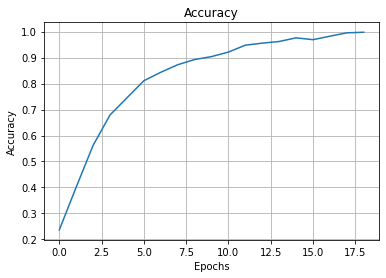

In [13]:
pltu.plottingAccuracy(history, "images_point_two", "accuracy_1")

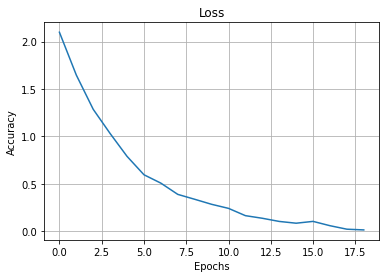

In [14]:
pltu.plottingLoss(history, "images_point_two", "loss_1")

In [15]:
print('Classification Report')
print(classification_report(yTest, yPred, target_names=labels))

Classification Report
              precision    recall  f1-score   support

         171       0.80      1.00      0.89         8
   178_FORSE       0.83      0.90      0.86        39
         371       0.96      0.90      0.93        30
   385_FORSE       0.97      0.97      0.97        72
          43       0.90      0.64      0.75        14
         438       1.00      0.67      0.80         3
         619       0.71      0.71      0.71         7
         655       0.85      0.87      0.86        38
         659       0.50      0.67      0.57         6
          72       0.83      0.91      0.86        53
          96       0.81      0.74      0.77        34
      Grandi       0.50      0.20      0.29         5

    accuracy                           0.86       309
   macro avg       0.81      0.76      0.77       309
weighted avg       0.87      0.86      0.86       309



With the data augmentation alone we get an accuracy of about 0.44. Now let's try to use a BatchNormalization, add a Dropout, change the CNN structure trying to reach an accuracy of about 0.60

# Batch Normalization

To use tf.keras.layers.BatchNormalization you need to use set the axis you are considering. By default this has value -1 and must be an integer.
To improve regularization we also add dropout layers (tf.keras.layers.Dropout) to CNNs.

In [16]:
adam = optimizers.Adam()
print("Create CNN with kernel size = 3")
modelAdam3x3 = Sequential([
    Conv2D(filters=8,kernel_size=3,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])
modelAdam3x3.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

print("Create CNN with kernel size = 5")
modelAdam5x5 = Sequential([
    Conv2D(filters=8,kernel_size=5,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=5,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=5,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])
modelAdam5x5.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

print("Create CNN with kernel size = 7")
modelAdam7x7 = Sequential([
    Conv2D(filters=8,kernel_size=7,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=7,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=7,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])

modelAdam7x7.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

Create CNN with kernel size = 3
Create CNN with kernel size = 5
Create CNN with kernel size = 7


In [17]:
modelAdam3x3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 8)         80        
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 8)         248       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 16)        116       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)       

In [18]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

print("Fit Adam Model with kernel size = 3")
historyAdam3=modelAdam3x3.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
print("Fit Adam Model with kernel size = 5")
historyAdam5=modelAdam5x5.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
print("Fit Adam Model with kernel size = 7")
historyAdam7=modelAdam7x7.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Fit Adam Model with kernel size = 3
Epoch 1/100
80/80 [==============================] - 5s 56ms/step - loss: 2.0135 - accuracy: 0.3646 - val_loss: 3.0059 - val_accuracy: 0.0355
Epoch 2/100
80/80 [==============================] - 4s 54ms/step - loss: 1.3603 - accuracy: 0.6852 - val_loss: 3.3020 - val_accuracy: 0.1242
Epoch 3/100
80/80 [==============================] - 4s 55ms/step - loss: 1.0162 - accuracy: 0.7777 - val_loss: 4.1250 - val_accuracy: 0.1330
Epoch 4/100
80/80 [==============================] - 4s 56ms/step - loss: 0.8045 - accuracy: 0.8205 - val_loss: 3.5182 - val_accuracy: 0.1330
Epoch 5/100
80/80 [==============================] - 5s 56ms/step - loss: 0.6460 - accuracy: 0.8444 - val_loss: 2.2020 - val_accuracy: 0.2328
Epoch 6/100
80/80 [==============================] - 5s 57ms/step - loss: 0.5479 - accuracy: 0.8710 - val_loss: 1.3308 - val_accuracy: 0.6009
Epoch 7/100
80/80 [==============================] - 5s 62ms/step - loss: 0.4708 - accuracy: 0.8797 - val_loss: 

Epoch 8/100
80/80 [==============================] - 7s 91ms/step - loss: 0.6358 - accuracy: 0.8118 - val_loss: 1.0776 - val_accuracy: 0.6031
Epoch 9/100
80/80 [==============================] - 7s 87ms/step - loss: 0.5389 - accuracy: 0.8459 - val_loss: 1.1019 - val_accuracy: 0.6563
Epoch 10/100
80/80 [==============================] - 7s 88ms/step - loss: 0.4887 - accuracy: 0.8601 - val_loss: 0.6391 - val_accuracy: 0.7672
Epoch 11/100
80/80 [==============================] - 7s 88ms/step - loss: 0.4298 - accuracy: 0.8761 - val_loss: 0.6830 - val_accuracy: 0.7960
Epoch 12/100
80/80 [==============================] - 7s 90ms/step - loss: 0.3951 - accuracy: 0.8816 - val_loss: 0.5808 - val_accuracy: 0.8093
Epoch 13/100
80/80 [==============================] - 7s 84ms/step - loss: 0.3631 - accuracy: 0.8938 - val_loss: 0.4812 - val_accuracy: 0.8426
Epoch 14/100
80/80 [==============================] - 7s 89ms/step - loss: 0.3694 - accuracy: 0.8875 - val_loss: 0.6247 - val_accuracy: 0.8004
E

In [19]:
modelAdam3x3.evaluate(xTest, yTestCategorical)
modelAdam5x5.evaluate(xTest, yTestCategorical)
modelAdam7x7.evaluate(xTest, yTestCategorical)

predictionAdam3 = modelAdam3x3.predict(xTest)
predictionAdam5 = modelAdam5x5.predict(xTest)
predictionAdam7 = modelAdam7x7.predict(xTest)

yPredAdam3 = dsu.predictClass(predictionAdam3)
yPredAdam5 = dsu.predictClass(predictionAdam5)
yPredAdam7 = dsu.predictClass(predictionAdam7)

10/10 [==============================] - 0s 16ms/step - loss: 0.4881 - accuracy: 0.8835


In [20]:
cmAdam3 = confusion_matrix(yTest, yPredAdam3)
cmAdam5 = confusion_matrix(yTest, yPredAdam5)
cmAdam7 = confusion_matrix(yTest, yPredAdam7)

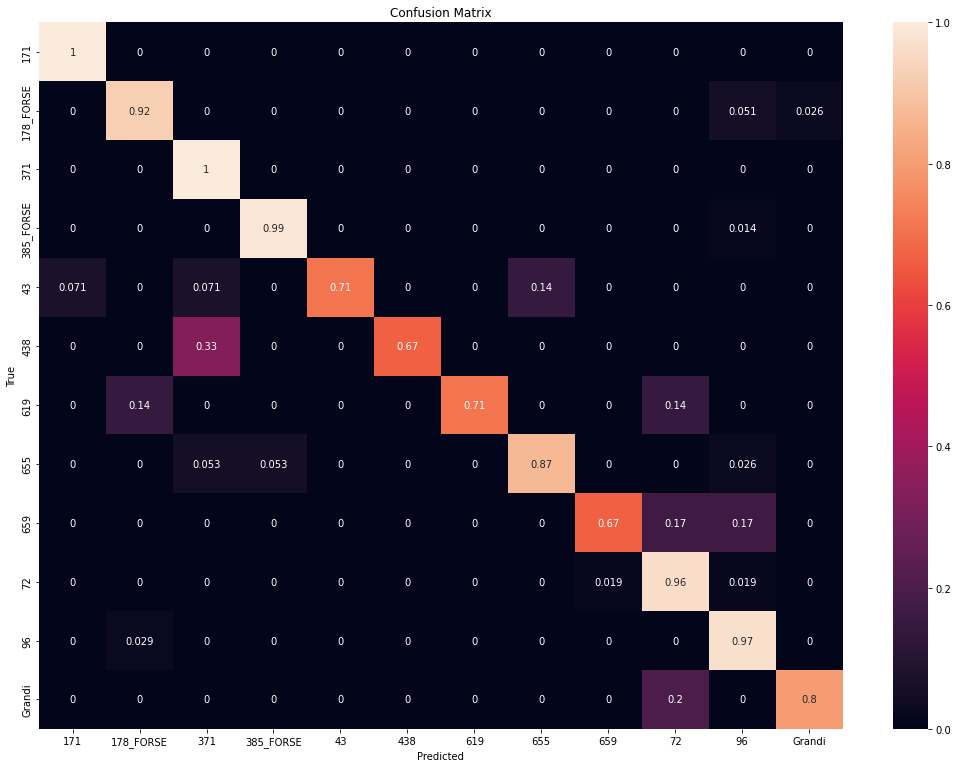

In [21]:
pltu.plotConfusionMatrix(cmAdam3, labels, "confusion_matrix_augmentation_adam_3", "images_point_two/")

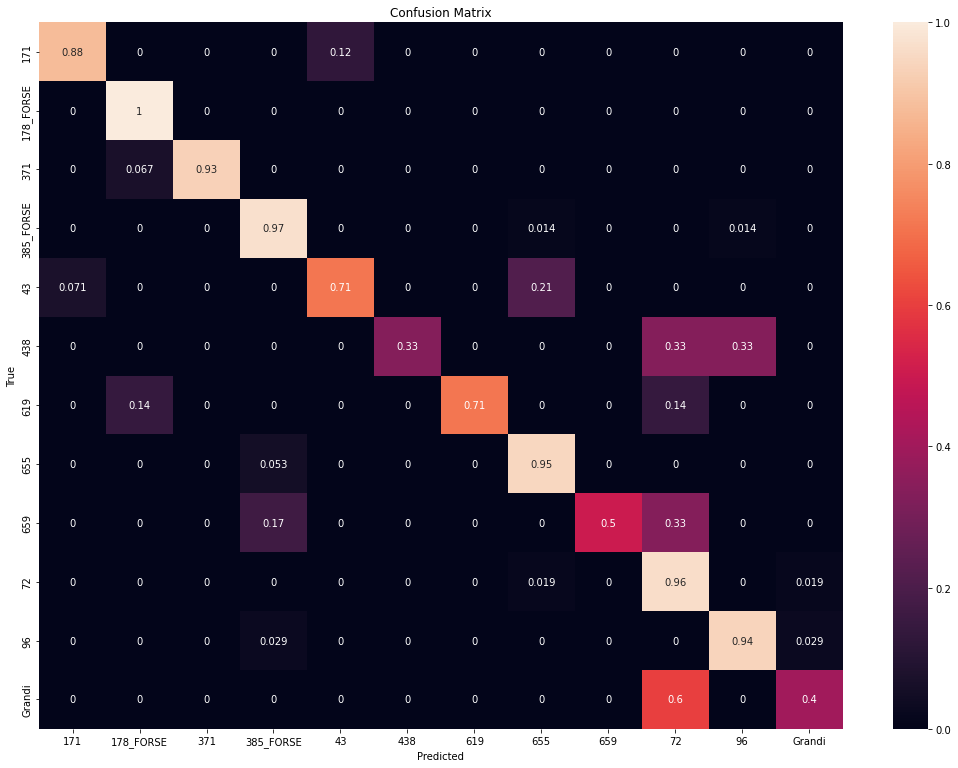

In [22]:
pltu.plotConfusionMatrix(cmAdam5, labels, "confusion_matrix_augmentation_adam_5", "images_point_two/")

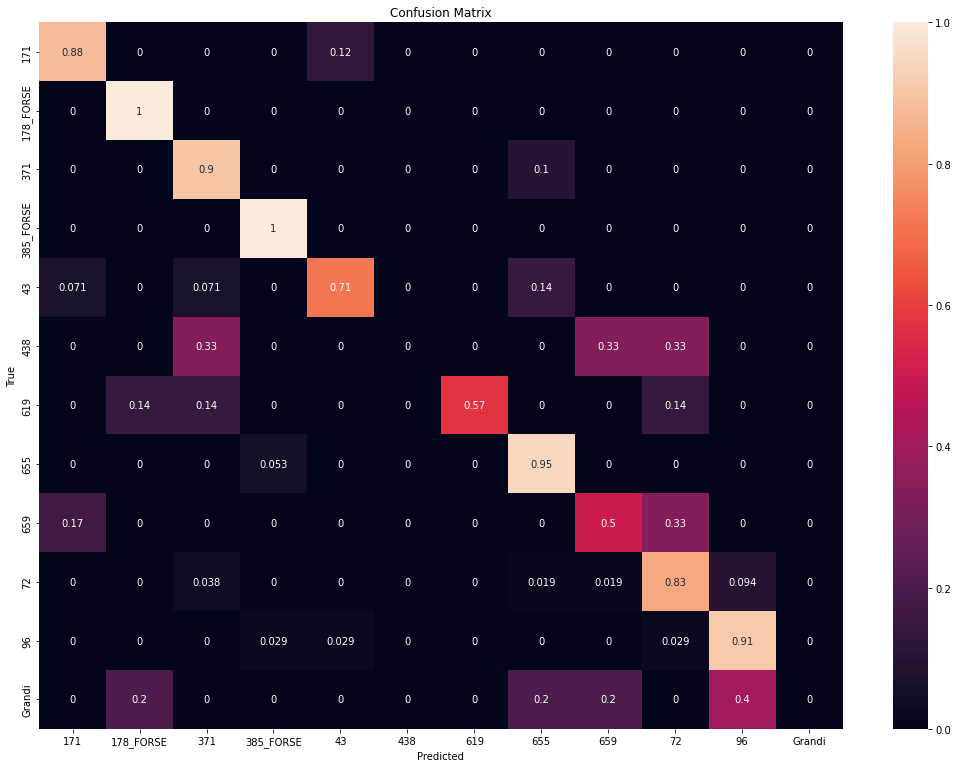

In [23]:
pltu.plotConfusionMatrix(cmAdam7, labels, "confusion_matrix_augmentation_adam_7", "images_point_two/")

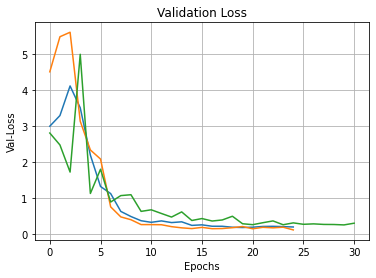

In [24]:
pltu.validationLoss(historyAdam3, "images_point_two", "validation_loss_adam_3")
pltu.validationLoss(historyAdam5, "images_point_two", "validation_loss_adam_5")
pltu.validationLoss(historyAdam7, "images_point_two", "validation_loss_adam_7")

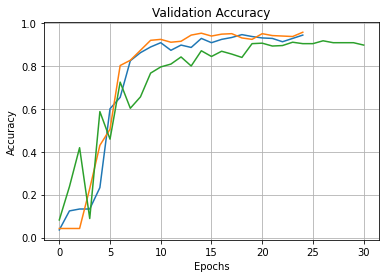

In [25]:
pltu.validationAccuracy(historyAdam3, "images_point_two", "validation_acc_3")
pltu.validationAccuracy(historyAdam5, "images_point_two", "validation_acc_5")
pltu.validationAccuracy(historyAdam7, "images_point_two", "validation_acc_7")

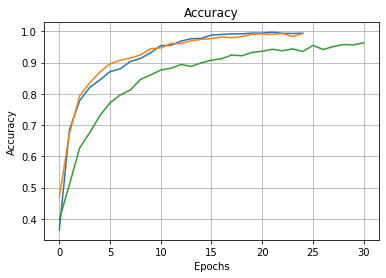

In [26]:
pltu.plottingAccuracy(historyAdam3, "images_point_two", "accuracy_3")
pltu.plottingAccuracy(historyAdam5, "images_point_two", "accuracy_5")
pltu.plottingAccuracy(historyAdam7, "images_point_two", "accuracy_7")

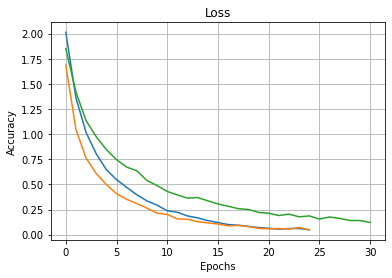

In [27]:
pltu.plottingLoss(historyAdam3, "images_point_two", "loss_1")
pltu.plottingLoss(historyAdam5, "images_point_two", "loss_3")
pltu.plottingLoss(historyAdam7, "images_point_two", "loss_7")

In [28]:
print('Classification Report')
print(classification_report(yTest, yPredAdam3, target_names=labels))

Classification Report
              precision    recall  f1-score   support

         171       0.89      1.00      0.94         8
   178_FORSE       0.95      0.92      0.94        39
         371       0.88      1.00      0.94        30
   385_FORSE       0.97      0.99      0.98        72
          43       1.00      0.71      0.83        14
         438       1.00      0.67      0.80         3
         619       1.00      0.71      0.83         7
         655       0.94      0.87      0.90        38
         659       0.80      0.67      0.73         6
          72       0.94      0.96      0.95        53
          96       0.85      0.97      0.90        34
      Grandi       0.80      0.80      0.80         5

    accuracy                           0.93       309
   macro avg       0.92      0.86      0.88       309
weighted avg       0.93      0.93      0.93       309



In [29]:
print('Classification Report')
print(classification_report(yTest, yPredAdam5, target_names=labels))

Classification Report
              precision    recall  f1-score   support

         171       0.88      0.88      0.88         8
   178_FORSE       0.93      1.00      0.96        39
         371       1.00      0.93      0.97        30
   385_FORSE       0.95      0.97      0.96        72
          43       0.91      0.71      0.80        14
         438       1.00      0.33      0.50         3
         619       1.00      0.71      0.83         7
         655       0.88      0.95      0.91        38
         659       1.00      0.50      0.67         6
          72       0.88      0.96      0.92        53
          96       0.94      0.94      0.94        34
      Grandi       0.50      0.40      0.44         5

    accuracy                           0.92       309
   macro avg       0.90      0.77      0.81       309
weighted avg       0.92      0.92      0.91       309



In [30]:
print('Classification Report')
print(classification_report(yTest, yPredAdam7, target_names=labels))

Classification Report
              precision    recall  f1-score   support

         171       0.78      0.88      0.82         8
   178_FORSE       0.95      1.00      0.97        39
         371       0.84      0.90      0.87        30
   385_FORSE       0.96      1.00      0.98        72
          43       0.83      0.71      0.77        14
         438       0.00      0.00      0.00         3
         619       1.00      0.57      0.73         7
         655       0.84      0.95      0.89        38
         659       0.50      0.50      0.50         6
          72       0.90      0.83      0.86        53
          96       0.82      0.91      0.86        34
      Grandi       0.00      0.00      0.00         5

    accuracy                           0.88       309
   macro avg       0.70      0.69      0.69       309
weighted avg       0.86      0.88      0.87       309



C:\Users\39320\anaconda3\envs\notebook\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\39320\anaconda3\envs\notebook\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\39320\anaconda3\envs\notebook\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ensemble Of Network

The idea is to combine a CNN and the use of the majority vote in the average of the prediction probabilities.

Ensemble a new network with 10 iterations

In [31]:
earlyStopping = EarlyStopping(min_delta=0.0, patience = 10)
prediction = np.zeros((xTest.shape[0],12))
predictionVoting = []
loss = []
validationLoss = []
validationAccuracy = []
accuracy = []

for i in range(10):
    network = Sequential([
        Conv2D(filters=8,kernel_size=3,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
        BatchNormalization(axis = 1),
        MaxPooling2D(pool_size=2,strides=2),
        Dropout(0.2),
        Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
        BatchNormalization(axis = 1),
        MaxPooling2D(pool_size=2,strides=2),
        Dropout(0.2),
        Conv2D(filters=32,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
        Flatten(),
        Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
        BatchNormalization(axis = 1),
        Dense(numberOfClasses,activation='softmax')
    ])
    network.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])
    historyNetwork=network.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
    preditcion = prediction + network.predict(xTest)
    predictionVoting.append(dsu.predictClass(network.predict(xTest))) 
    loss.append(historyNetwork.history['loss'])
    validationLoss.append(historyNetwork.history['val_loss'])
    validationAccuracy.append(historyNetwork.history['val_accuracy'])
    accuracy.append(historyNetwork.history['accuracy'])

prediction = prediction/10
    

Epoch 1/100
80/80 [==============================] - 5s 54ms/step - loss: 1.7002 - accuracy: 0.4575 - val_loss: 3.5295 - val_accuracy: 0.0421
Epoch 2/100
80/80 [==============================] - 4s 52ms/step - loss: 0.9594 - accuracy: 0.7150 - val_loss: 4.7473 - val_accuracy: 0.0421
Epoch 3/100
80/80 [==============================] - 4s 53ms/step - loss: 0.6503 - accuracy: 0.8271 - val_loss: 5.8321 - val_accuracy: 0.0488
Epoch 4/100
80/80 [==============================] - 4s 56ms/step - loss: 0.4886 - accuracy: 0.8746 - val_loss: 5.1509 - val_accuracy: 0.0576
Epoch 5/100
80/80 [==============================] - 4s 55ms/step - loss: 0.3721 - accuracy: 0.9020 - val_loss: 3.4626 - val_accuracy: 0.1818
Epoch 6/100
80/80 [==============================] - 5s 60ms/step - loss: 0.3116 - accuracy: 0.9177 - val_loss: 2.1804 - val_accuracy: 0.4656
Epoch 7/100
80/80 [==============================] - 5s 64ms/step - loss: 0.2520 - accuracy: 0.9377 - val_loss: 0.7116 - val_accuracy: 0.7982
Epoch 

80/80 [==============================] - 6s 77ms/step - loss: 0.0822 - accuracy: 0.9816 - val_loss: 0.3505 - val_accuracy: 0.8914
Epoch 15/100
80/80 [==============================] - 6s 78ms/step - loss: 0.0651 - accuracy: 0.9914 - val_loss: 0.2643 - val_accuracy: 0.9091
Epoch 16/100
80/80 [==============================] - 6s 72ms/step - loss: 0.0646 - accuracy: 0.9882 - val_loss: 0.2089 - val_accuracy: 0.9357
Epoch 17/100
80/80 [==============================] - 6s 69ms/step - loss: 0.0547 - accuracy: 0.9906 - val_loss: 0.2298 - val_accuracy: 0.9313
Epoch 18/100
80/80 [==============================] - 6s 70ms/step - loss: 0.0496 - accuracy: 0.9926 - val_loss: 0.3344 - val_accuracy: 0.9047
Epoch 19/100
80/80 [==============================] - 6s 71ms/step - loss: 0.0423 - accuracy: 0.9914 - val_loss: 0.2197 - val_accuracy: 0.9268
Epoch 20/100
80/80 [==============================] - 6s 77ms/step - loss: 0.0384 - accuracy: 0.9926 - val_loss: 0.1937 - val_accuracy: 0.9246
Epoch 21/100

80/80 [==============================] - 5s 64ms/step - loss: 0.0210 - accuracy: 0.9949 - val_loss: 0.2255 - val_accuracy: 0.9357
Epoch 42/100
80/80 [==============================] - 6s 69ms/step - loss: 0.0136 - accuracy: 0.9992 - val_loss: 0.1693 - val_accuracy: 0.9313
Epoch 43/100
80/80 [==============================] - 6s 70ms/step - loss: 0.0210 - accuracy: 0.9949 - val_loss: 0.1851 - val_accuracy: 0.9446
Epoch 44/100
80/80 [==============================] - 5s 68ms/step - loss: 0.0138 - accuracy: 0.9973 - val_loss: 0.1543 - val_accuracy: 0.9512
Epoch 1/100
80/80 [==============================] - 6s 70ms/step - loss: 2.0453 - accuracy: 0.3493 - val_loss: 2.3091 - val_accuracy: 0.2328
Epoch 2/100
80/80 [==============================] - 5s 65ms/step - loss: 1.6201 - accuracy: 0.4665 - val_loss: 2.2410 - val_accuracy: 0.2395
Epoch 3/100
80/80 [==============================] - 6s 71ms/step - loss: 1.4451 - accuracy: 0.5402 - val_loss: 2.0871 - val_accuracy: 0.3060
Epoch 4/100
80/

80/80 [==============================] - 5s 65ms/step - loss: 0.9375 - accuracy: 0.6923 - val_loss: 1.9943 - val_accuracy: 0.4346
Epoch 6/100
80/80 [==============================] - 5s 65ms/step - loss: 0.8277 - accuracy: 0.7248 - val_loss: 1.3423 - val_accuracy: 0.5787
Epoch 7/100
80/80 [==============================] - 5s 64ms/step - loss: 0.7468 - accuracy: 0.7577 - val_loss: 1.5814 - val_accuracy: 0.4900
Epoch 8/100
80/80 [==============================] - 5s 64ms/step - loss: 0.6415 - accuracy: 0.7930 - val_loss: 1.2774 - val_accuracy: 0.5521
Epoch 9/100
80/80 [==============================] - 5s 64ms/step - loss: 0.5826 - accuracy: 0.8130 - val_loss: 0.9392 - val_accuracy: 0.6452
Epoch 10/100
80/80 [==============================] - 5s 63ms/step - loss: 0.4980 - accuracy: 0.8503 - val_loss: 0.5861 - val_accuracy: 0.8027
Epoch 11/100
80/80 [==============================] - 5s 66ms/step - loss: 0.4494 - accuracy: 0.8636 - val_loss: 0.4713 - val_accuracy: 0.8603
Epoch 12/100
80/

80/80 [==============================] - 5s 65ms/step - loss: 1.4208 - accuracy: 0.5696 - val_loss: 5.1078 - val_accuracy: 0.0421
Epoch 3/100
80/80 [==============================] - 5s 63ms/step - loss: 1.0714 - accuracy: 0.7315 - val_loss: 15.5275 - val_accuracy: 0.0133
Epoch 4/100
80/80 [==============================] - 5s 63ms/step - loss: 0.8472 - accuracy: 0.7954 - val_loss: 3.9122 - val_accuracy: 0.0909
Epoch 5/100
80/80 [==============================] - 5s 68ms/step - loss: 0.6686 - accuracy: 0.8401 - val_loss: 3.5194 - val_accuracy: 0.0998
Epoch 6/100
80/80 [==============================] - 5s 68ms/step - loss: 0.5709 - accuracy: 0.8538 - val_loss: 2.3744 - val_accuracy: 0.3237
Epoch 7/100
80/80 [==============================] - 5s 68ms/step - loss: 0.4757 - accuracy: 0.8855 - val_loss: 0.7868 - val_accuracy: 0.7938
Epoch 8/100
80/80 [==============================] - 5s 64ms/step - loss: 0.4093 - accuracy: 0.9004 - val_loss: 0.6149 - val_accuracy: 0.8271
Epoch 9/100
80/80

80/80 [==============================] - 5s 63ms/step - loss: 0.1457 - accuracy: 0.9624 - val_loss: 0.3847 - val_accuracy: 0.8825
Epoch 18/100
80/80 [==============================] - 5s 62ms/step - loss: 0.1489 - accuracy: 0.9639 - val_loss: 0.5493 - val_accuracy: 0.8226
Epoch 19/100
80/80 [==============================] - 5s 63ms/step - loss: 0.1151 - accuracy: 0.9773 - val_loss: 0.3998 - val_accuracy: 0.8625
Epoch 20/100
80/80 [==============================] - 5s 63ms/step - loss: 0.1063 - accuracy: 0.9761 - val_loss: 0.3147 - val_accuracy: 0.9024
Epoch 21/100
80/80 [==============================] - 5s 62ms/step - loss: 0.1025 - accuracy: 0.9765 - val_loss: 0.3329 - val_accuracy: 0.8847
Epoch 22/100
80/80 [==============================] - 5s 63ms/step - loss: 0.1036 - accuracy: 0.9757 - val_loss: 0.3309 - val_accuracy: 0.8891
Epoch 23/100
80/80 [==============================] - 5s 63ms/step - loss: 0.0914 - accuracy: 0.9808 - val_loss: 0.3461 - val_accuracy: 0.8847
Epoch 24/100

80/80 [==============================] - 6s 71ms/step - loss: 0.5098 - accuracy: 0.8546 - val_loss: 1.4221 - val_accuracy: 0.5410
Epoch 6/100
80/80 [==============================] - 6s 69ms/step - loss: 0.4328 - accuracy: 0.8710 - val_loss: 0.8271 - val_accuracy: 0.7384
Epoch 7/100
80/80 [==============================] - 5s 68ms/step - loss: 0.3469 - accuracy: 0.8985 - val_loss: 0.7154 - val_accuracy: 0.7650
Epoch 8/100
80/80 [==============================] - 5s 68ms/step - loss: 0.3049 - accuracy: 0.9106 - val_loss: 0.5067 - val_accuracy: 0.8337
Epoch 9/100
80/80 [==============================] - 5s 68ms/step - loss: 0.4021 - accuracy: 0.8722 - val_loss: 0.3339 - val_accuracy: 0.8914
Epoch 10/100
80/80 [==============================] - 5s 69ms/step - loss: 0.2686 - accuracy: 0.9236 - val_loss: 0.3398 - val_accuracy: 0.8803
Epoch 11/100
80/80 [==============================] - 5s 67ms/step - loss: 0.2078 - accuracy: 0.9486 - val_loss: 0.4491 - val_accuracy: 0.8514
Epoch 12/100
80/

80/80 [==============================] - 5s 67ms/step - loss: 0.1611 - accuracy: 0.9604 - val_loss: 0.2835 - val_accuracy: 0.9047
Epoch 15/100
80/80 [==============================] - 5s 67ms/step - loss: 0.1461 - accuracy: 0.9620 - val_loss: 0.2939 - val_accuracy: 0.9069
Epoch 16/100
80/80 [==============================] - 5s 67ms/step - loss: 0.1284 - accuracy: 0.9675 - val_loss: 0.2454 - val_accuracy: 0.9180
Epoch 17/100
80/80 [==============================] - 5s 68ms/step - loss: 0.1267 - accuracy: 0.9655 - val_loss: 0.2940 - val_accuracy: 0.8936
Epoch 18/100
80/80 [==============================] - 5s 67ms/step - loss: 0.1103 - accuracy: 0.9710 - val_loss: 0.2444 - val_accuracy: 0.9180
Epoch 19/100
80/80 [==============================] - 6s 69ms/step - loss: 0.0942 - accuracy: 0.9796 - val_loss: 0.2270 - val_accuracy: 0.9246
Epoch 20/100
80/80 [==============================] - 5s 67ms/step - loss: 0.0822 - accuracy: 0.9831 - val_loss: 0.3203 - val_accuracy: 0.8980
Epoch 21/100

Plot of some graphs

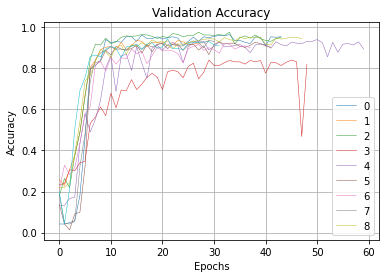

In [32]:
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
for p in validationAccuracy:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)

plt.grid()

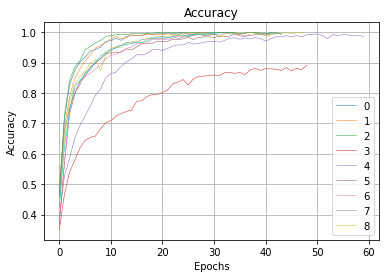

In [33]:
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
for p in accuracy:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)
plt.grid()

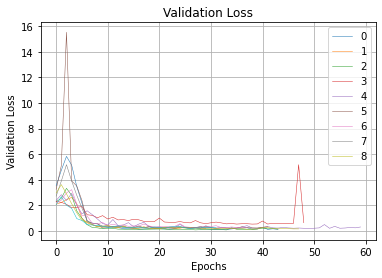

In [34]:
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
for p in validationLoss:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)
plt.grid()

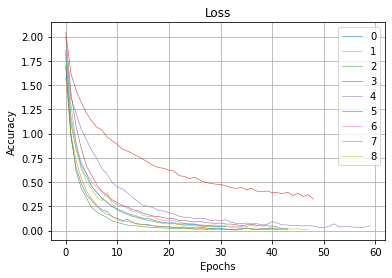

In [35]:
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
for p in loss:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)
plt.grid()

# point 2 with crop e rotation

In [36]:
xTrainAugCropRot, yTrainAugCropRot = dsu.dataAugmentationWithCropRot(pathTrain, labels)
xTest, yTest = dsu.loadImages(pathTest, labels)
print("Train len: ", len(xTrainAugCropRot))
print("Train label len: ", len(yTrainAugCropRot))
print("---------------------------------")
print("Test len: ", len(xTest))
print("Test label len: ", len(yTest))

Train len:  6004
Train label len:  6004
---------------------------------
Test len:  309
Test label len:  309


In [37]:
yTrainCategorical = to_categorical(yTrainAugCropRot)
yTestCategorical = to_categorical(yTest)

In [38]:
xTrain, xValidation, yTrain, yValidation = train_test_split(xTrainAugCropRot, yTrainCategorical, train_size=0.85, random_state=275)
print('len Train Set: ',len(xTrain))
print('len Validation Set: ',len(xValidation))
print('len Test Set: ',len(xTest))

len Train Set:  5103
len Validation Set:  901
len Test Set:  309


# CNN MODEL

Initially we try to apply the data augmentation to the cnn of point one

In [39]:
sgd = tf.keras.optimizers.SGD(momentum=0.9,nesterov=True)
norm = ks.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
baseModel = Sequential([
    #first convolutional layer
    Conv2D(8, 3,strides=1, padding='valid', activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #second convolutional layer
    Conv2D(16, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #third convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses, activation='relu',kernel_initializer=norm, bias_initializer='zeros'),
    Dense(numberOfClasses, activation='softmax')
])

baseModel.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

In [40]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

history=baseModel.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Epoch 1/100
160/160 [==============================] - 5s 27ms/step - loss: 1.9937 - accuracy: 0.2851 - val_loss: 1.7813 - val_accuracy: 0.3740
Epoch 2/100
160/160 [==============================] - 5s 29ms/step - loss: 1.7075 - accuracy: 0.3735 - val_loss: 1.5850 - val_accuracy: 0.4129
Epoch 3/100
160/160 [==============================] - 4s 27ms/step - loss: 1.5406 - accuracy: 0.4233 - val_loss: 1.5503 - val_accuracy: 0.4550
Epoch 4/100
160/160 [==============================] - 4s 28ms/step - loss: 1.5812 - accuracy: 0.4411 - val_loss: 2.3846 - val_accuracy: 0.1154
Epoch 5/100
160/160 [==============================] - 4s 28ms/step - loss: 1.7748 - accuracy: 0.3406 - val_loss: 1.5864 - val_accuracy: 0.4384
Epoch 6/100
160/160 [==============================] - 5s 29ms/step - loss: 1.4310 - accuracy: 0.4795 - val_loss: 1.3950 - val_accuracy: 0.5039
Epoch 7/100
160/160 [==============================] - 5s 31ms/step - loss: 1.3037 - accuracy: 0.5338 - val_loss: 1.2329 - val_accuracy:

In [41]:
baseModel.evaluate(xTest, yTestCategorical)

prediction = baseModel.predict(xTest) 
yPred = dsu.predictClass(prediction)
cm=confusion_matrix(yTest, yPred)

10/10 [==============================] - 0s 9ms/step - loss: 0.9169 - accuracy: 0.7799


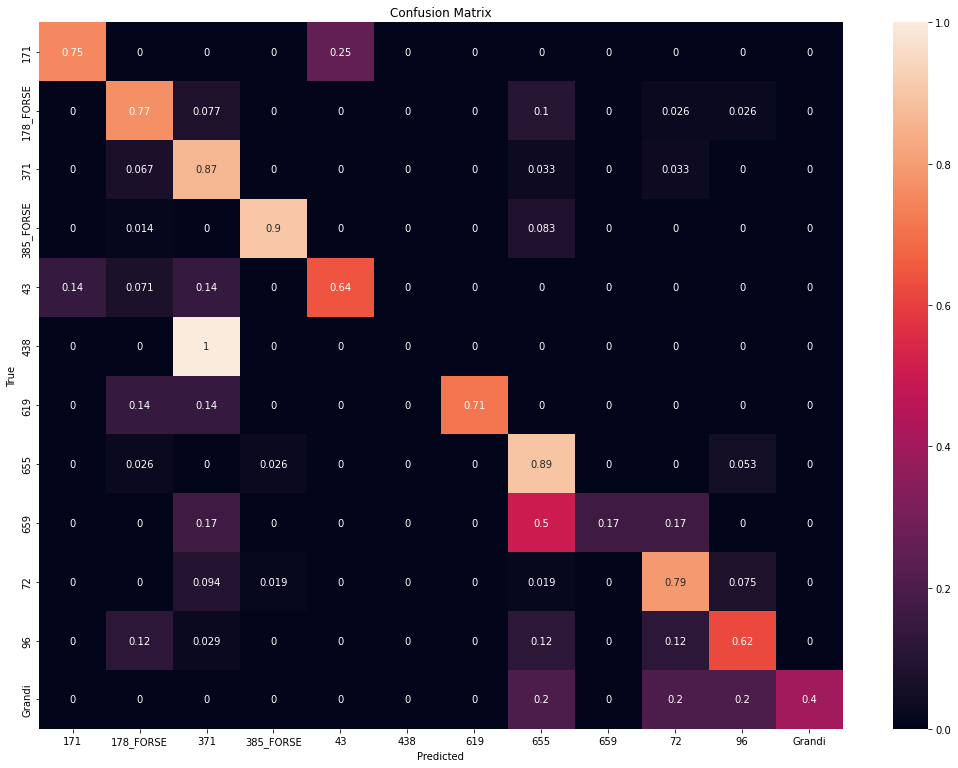

In [42]:
pltu.plotConfusionMatrix(cm, labels, "confusion_matrix_augmentation", "images_point_two/")

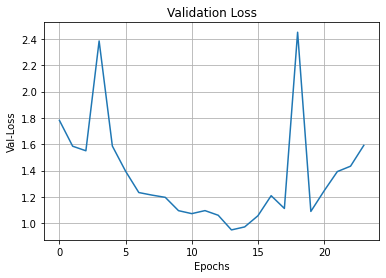

In [43]:
pltu.validationLoss(history, "images_point_two", "validation_loss_1")

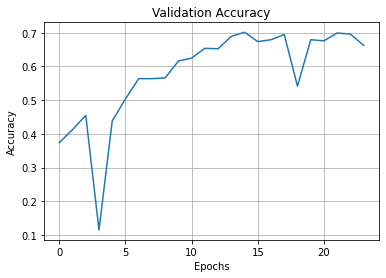

In [44]:
pltu.validationAccuracy(history, "images_point_two", "validation_acc_1")

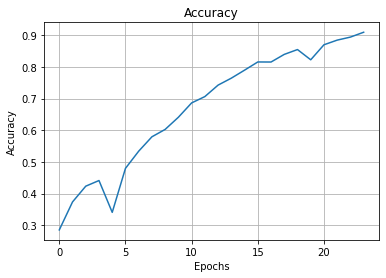

In [45]:
pltu.plottingAccuracy(history, "images_point_two", "accuracy_1")

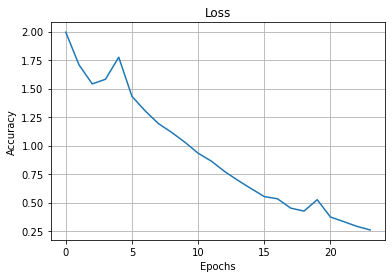

In [46]:
pltu.plottingLoss(history, "images_point_two", "loss_1")

In [47]:
print('Classification Report')
print(classification_report(yTest, yPred, target_names=labels))

Classification Report
              precision    recall  f1-score   support

         171       0.75      0.75      0.75         8
   178_FORSE       0.75      0.77      0.76        39
         371       0.62      0.87      0.72        30
   385_FORSE       0.97      0.90      0.94        72
          43       0.82      0.64      0.72        14
         438       0.00      0.00      0.00         3
         619       1.00      0.71      0.83         7
         655       0.63      0.89      0.74        38
         659       1.00      0.17      0.29         6
          72       0.84      0.79      0.82        53
          96       0.72      0.62      0.67        34
      Grandi       1.00      0.40      0.57         5

    accuracy                           0.78       309
   macro avg       0.76      0.63      0.65       309
weighted avg       0.80      0.78      0.77       309



C:\Users\39320\anaconda3\envs\notebook\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\39320\anaconda3\envs\notebook\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\39320\anaconda3\envs\notebook\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With the data augmentation alone we get an accuracy of about 0.44. Now let's try to use a BatchNormalization, add a Dropout, change the CNN structure trying to reach an accuracy of about 0.60

# Batch Normalization

To use tf.keras.layers.BatchNormalization you need to use set the axis you are considering. By default this has value -1 and must be an integer.
To improve regularization we also add dropout layers (tf.keras.layers.Dropout) to CNNs.

In [48]:
adam = optimizers.Adam()
print("Create CNN with kernel size = 3")
modelAdam3x3 = Sequential([
    Conv2D(filters=8,kernel_size=3,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])
modelAdam3x3.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

print("Create CNN with kernel size = 5")
modelAdam5x5 = Sequential([
    Conv2D(filters=8,kernel_size=5,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=5,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=5,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])
modelAdam5x5.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

print("Create CNN with kernel size = 7")
modelAdam7x7 = Sequential([
    Conv2D(filters=8,kernel_size=7,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=16,kernel_size=7,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    BatchNormalization(axis = 1),
    MaxPooling2D(pool_size=2,strides=2),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=7,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
    BatchNormalization(axis = 1),
    Dense(numberOfClasses,activation='softmax')
])

modelAdam7x7.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])

Create CNN with kernel size = 3
Create CNN with kernel size = 5
Create CNN with kernel size = 7


In [49]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

print("Fit Adam Model with kernel size = 3")
historyAdam3=modelAdam3x3.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
print("Fit Adam Model with kernel size = 5")
historyAdam5=modelAdam5x5.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
print("Fit Adam Model with kernel size = 7")
historyAdam7=modelAdam7x7.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Fit Adam Model with kernel size = 3
Epoch 1/100
160/160 [==============================] - 10s 57ms/step - loss: 2.0030 - accuracy: 0.3617 - val_loss: 3.9713 - val_accuracy: 0.2109
Epoch 2/100
160/160 [==============================] - 9s 55ms/step - loss: 1.6534 - accuracy: 0.4656 - val_loss: 3.3341 - val_accuracy: 0.1299
Epoch 3/100
160/160 [==============================] - 10s 63ms/step - loss: 1.3568 - accuracy: 0.5850 - val_loss: 2.4101 - val_accuracy: 0.3030
Epoch 4/100
160/160 [==============================] - 10s 65ms/step - loss: 1.1322 - accuracy: 0.6537 - val_loss: 1.3432 - val_accuracy: 0.5794
Epoch 5/100
160/160 [==============================] - 10s 64ms/step - loss: 0.9752 - accuracy: 0.7059 - val_loss: 1.2720 - val_accuracy: 0.5982
Epoch 6/100
160/160 [==============================] - 10s 64ms/step - loss: 0.8557 - accuracy: 0.7366 - val_loss: 0.9430 - val_accuracy: 0.6915
Epoch 7/100
160/160 [==============================] - 10s 64ms/step - loss: 0.7770 - accuracy:

160/160 [==============================] - 14s 88ms/step - loss: 1.2073 - accuracy: 0.5857 - val_loss: 1.3647 - val_accuracy: 0.5383
Epoch 7/100
160/160 [==============================] - 14s 89ms/step - loss: 1.1385 - accuracy: 0.6079 - val_loss: 1.2230 - val_accuracy: 0.5838
Epoch 8/100
160/160 [==============================] - 15s 91ms/step - loss: 1.0851 - accuracy: 0.6263 - val_loss: 1.4934 - val_accuracy: 0.5139
Epoch 9/100
160/160 [==============================] - 14s 88ms/step - loss: 1.0410 - accuracy: 0.6445 - val_loss: 1.3697 - val_accuracy: 0.5649
Epoch 10/100
160/160 [==============================] - 14s 90ms/step - loss: 0.9965 - accuracy: 0.6635 - val_loss: 1.5288 - val_accuracy: 0.4695
Epoch 11/100
160/160 [==============================] - 14s 88ms/step - loss: 0.9527 - accuracy: 0.6782 - val_loss: 1.1326 - val_accuracy: 0.6149
Epoch 12/100
160/160 [==============================] - 15s 91ms/step - loss: 0.9196 - accuracy: 0.6841 - val_loss: 1.2820 - val_accuracy: 0

In [50]:
modelAdam3x3.evaluate(xTest, yTestCategorical)
modelAdam5x5.evaluate(xTest, yTestCategorical)
modelAdam7x7.evaluate(xTest, yTestCategorical)

predictionAdam3 = modelAdam3x3.predict(xTest)
predictionAdam5 = modelAdam5x5.predict(xTest)
predictionAdam7 = modelAdam7x7.predict(xTest)

yPredAdam3 = dsu.predictClass(predictionAdam3)
yPredAdam5 = dsu.predictClass(predictionAdam5)
yPredAdam7 = dsu.predictClass(predictionAdam7)

10/10 [==============================] - 0s 17ms/step - loss: 0.8991 - accuracy: 0.7282


In [51]:
cmAdam3 = confusion_matrix(yTest, yPredAdam3)
cmAdam5 = confusion_matrix(yTest, yPredAdam5)
cmAdam7 = confusion_matrix(yTest, yPredAdam7)

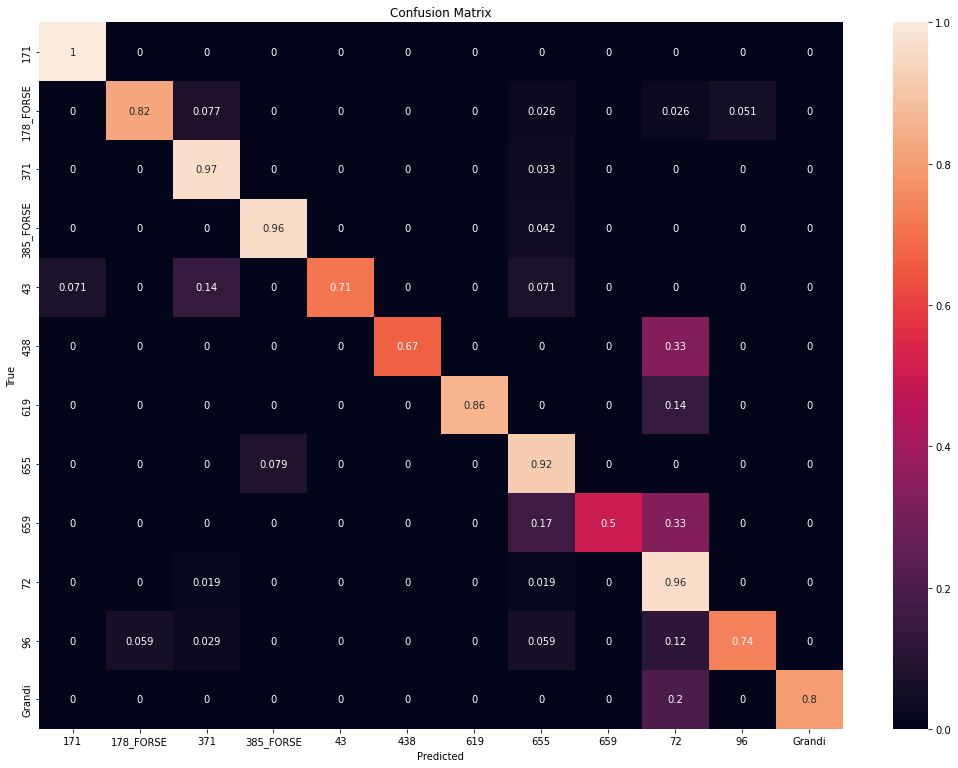

In [52]:
pltu.plotConfusionMatrix(cmAdam3, labels, "confusion_matrix_augmentation_adam_3", "images_point_two/")

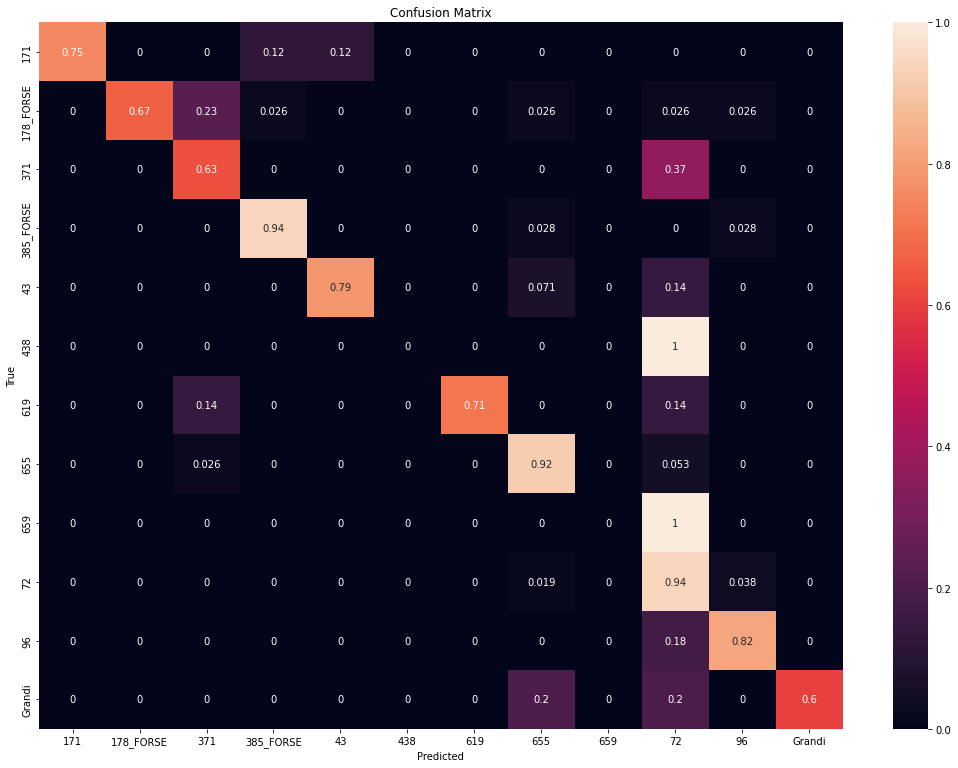

In [53]:
pltu.plotConfusionMatrix(cmAdam5, labels, "confusion_matrix_augmentation_adam_5", "images_point_two/")

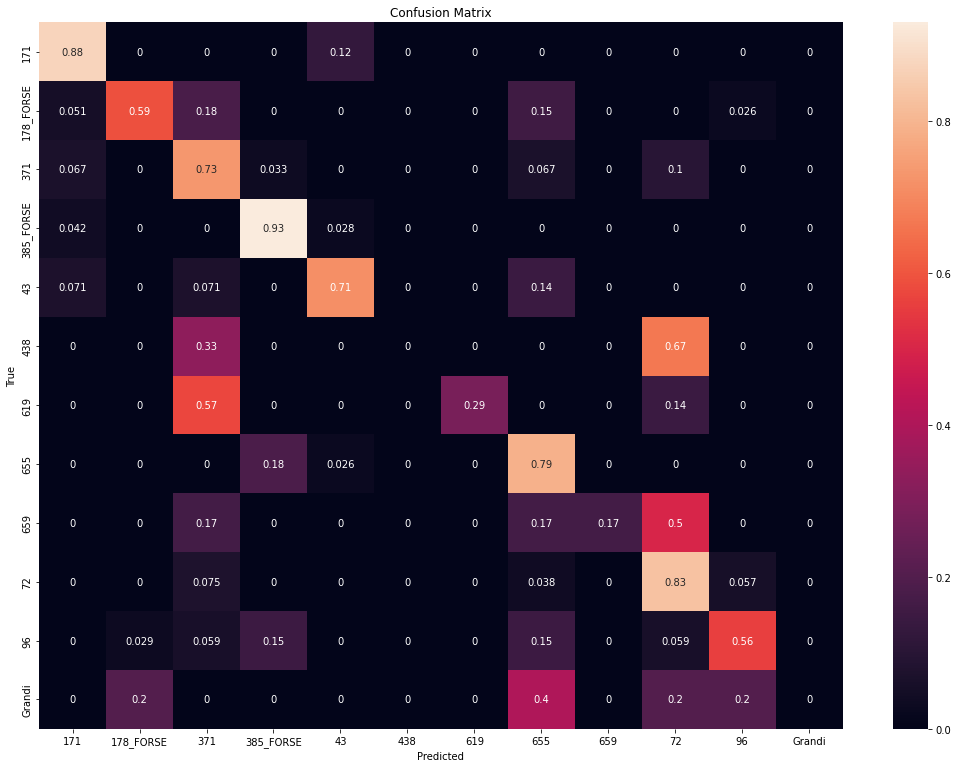

In [54]:
pltu.plotConfusionMatrix(cmAdam7, labels, "confusion_matrix_augmentation_adam_7", "images_point_two/")

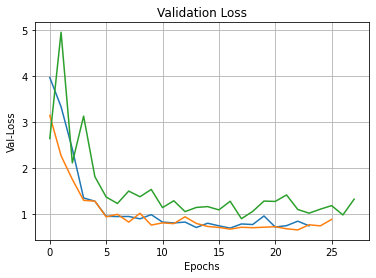

In [55]:
pltu.validationLoss(historyAdam3, "images_point_two", "validation_loss_adam_3")
pltu.validationLoss(historyAdam5, "images_point_two", "validation_loss_adam_5")
pltu.validationLoss(historyAdam7, "images_point_two", "validation_loss_adam_7")

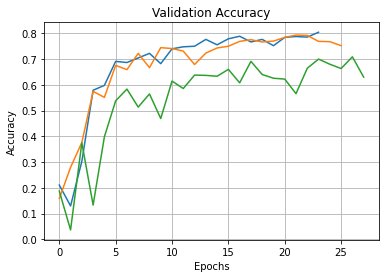

In [56]:
pltu.validationAccuracy(historyAdam3, "images_point_two", "validation_acc_3")
pltu.validationAccuracy(historyAdam5, "images_point_two", "validation_acc_5")
pltu.validationAccuracy(historyAdam7, "images_point_two", "validation_acc_7")

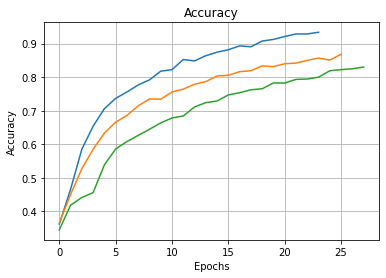

In [57]:
pltu.plottingAccuracy(historyAdam3, "images_point_two", "accuracy_3")
pltu.plottingAccuracy(historyAdam5, "images_point_two", "accuracy_5")
pltu.plottingAccuracy(historyAdam7, "images_point_two", "accuracy_7")

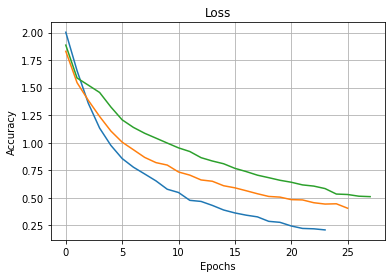

In [58]:
pltu.plottingLoss(historyAdam3, "images_point_two", "loss_1")
pltu.plottingLoss(historyAdam5, "images_point_two", "loss_3")
pltu.plottingLoss(historyAdam7, "images_point_two", "loss_7")

# Ensemle Of Network

The idea is to combine a CNN and the use of the majority vote in the average of the prediction probabilities.

Ensemble a new network with 10 iterations

In [59]:
earlyStopping = EarlyStopping(min_delta=0.0, patience = 10)
prediction = np.zeros((xTest.shape[0],12))
predictionVoting = []
loss = []
validationLoss = []
validationAccuracy = []
accuracy = []

for i in range(10):
    network = Sequential([
        Conv2D(filters=8,kernel_size=3,strides=1,padding = 'valid',activation='relu',input_shape=(64,64,1)),
        BatchNormalization(axis = 1),
        MaxPooling2D(pool_size=2,strides=2),
        Dropout(0.2),
        Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
        BatchNormalization(axis = 1),
        MaxPooling2D(pool_size=2,strides=2),
        Dropout(0.2),
        Conv2D(filters=32,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(64,64,1)),
        Flatten(),
        Dense(numberOfClasses,activation='relu',kernel_initializer=norm,bias_initializer='zeros'),
        BatchNormalization(axis = 1),
        Dense(numberOfClasses,activation='softmax')
    ])
    network.compile(loss='categorical_crossentropy',optimizer=adam,metrics = ['accuracy'])
    historyNetwork=network.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])
    preditcion = prediction + network.predict(xTest)
    predictionVoting.append(dsu.predictClass(network.predict(xTest))) ## ma non fa il voting dato che si allenano in maniera indipendenti le reti
    #qua siamo ancora dentro il ciclo for, non può sapre delle altre reti ???
    loss.append(historyNetwork.history['loss'])
    validationLoss.append(historyNetwork.history['val_loss'])
    validationAccuracy.append(historyNetwork.history['val_accuracy'])
    accuracy.append(historyNetwork.history['accuracy'])

prediction = prediction/10
    

Epoch 1/100
160/160 [==============================] - 10s 60ms/step - loss: 1.8514 - accuracy: 0.3614 - val_loss: 2.3883 - val_accuracy: 0.2852
Epoch 2/100
160/160 [==============================] - 11s 68ms/step - loss: 1.4104 - accuracy: 0.5232 - val_loss: 2.4940 - val_accuracy: 0.3907
Epoch 3/100
160/160 [==============================] - 11s 66ms/step - loss: 1.1105 - accuracy: 0.6537 - val_loss: 1.4865 - val_accuracy: 0.5339
Epoch 4/100
160/160 [==============================] - 11s 71ms/step - loss: 0.9567 - accuracy: 0.6966 - val_loss: 1.0075 - val_accuracy: 0.6593
Epoch 5/100
160/160 [==============================] - 11s 67ms/step - loss: 0.8586 - accuracy: 0.7227 - val_loss: 0.8984 - val_accuracy: 0.7059
Epoch 6/100
160/160 [==============================] - 10s 64ms/step - loss: 0.7780 - accuracy: 0.7511 - val_loss: 0.9288 - val_accuracy: 0.6870
Epoch 7/100
160/160 [==============================] - 10s 64ms/step - loss: 0.7153 - accuracy: 0.7662 - val_loss: 0.8971 - val_ac

160/160 [==============================] - 10s 62ms/step - loss: 0.4522 - accuracy: 0.8464 - val_loss: 0.6841 - val_accuracy: 0.7569
Epoch 9/100
160/160 [==============================] - 10s 62ms/step - loss: 0.4124 - accuracy: 0.8609 - val_loss: 0.9140 - val_accuracy: 0.7303
Epoch 10/100
160/160 [==============================] - 10s 62ms/step - loss: 0.3512 - accuracy: 0.8856 - val_loss: 0.6896 - val_accuracy: 0.7703
Epoch 11/100
160/160 [==============================] - 10s 62ms/step - loss: 0.3184 - accuracy: 0.8926 - val_loss: 0.6614 - val_accuracy: 0.7769
Epoch 12/100
160/160 [==============================] - 10s 62ms/step - loss: 0.3013 - accuracy: 0.9050 - val_loss: 0.5745 - val_accuracy: 0.8202
Epoch 13/100
160/160 [==============================] - 10s 61ms/step - loss: 0.2677 - accuracy: 0.9151 - val_loss: 0.7214 - val_accuracy: 0.7825
Epoch 14/100
160/160 [==============================] - 10s 62ms/step - loss: 0.2552 - accuracy: 0.9181 - val_loss: 0.7232 - val_accuracy:

160/160 [==============================] - 14s 88ms/step - loss: 0.5329 - accuracy: 0.8189 - val_loss: 0.8837 - val_accuracy: 0.7281
Epoch 20/100
160/160 [==============================] - 11s 69ms/step - loss: 0.5434 - accuracy: 0.8152 - val_loss: 0.9001 - val_accuracy: 0.7381
Epoch 21/100
160/160 [==============================] - 11s 69ms/step - loss: 0.5131 - accuracy: 0.8244 - val_loss: 0.7938 - val_accuracy: 0.7625
Epoch 22/100
160/160 [==============================] - 11s 69ms/step - loss: 0.4933 - accuracy: 0.8313 - val_loss: 0.9585 - val_accuracy: 0.6992
Epoch 23/100
160/160 [==============================] - 11s 69ms/step - loss: 0.4812 - accuracy: 0.8405 - val_loss: 0.8645 - val_accuracy: 0.7425
Epoch 24/100
160/160 [==============================] - 11s 69ms/step - loss: 0.4620 - accuracy: 0.8374 - val_loss: 0.8834 - val_accuracy: 0.7381
Epoch 25/100
160/160 [==============================] - 11s 70ms/step - loss: 0.4532 - accuracy: 0.8401 - val_loss: 0.8692 - val_accuracy

160/160 [==============================] - 10s 63ms/step - loss: 0.3513 - accuracy: 0.8799 - val_loss: 0.8518 - val_accuracy: 0.7514
Epoch 22/100
160/160 [==============================] - 10s 63ms/step - loss: 0.3525 - accuracy: 0.8812 - val_loss: 0.6957 - val_accuracy: 0.7869
Epoch 23/100
160/160 [==============================] - 10s 65ms/step - loss: 0.3308 - accuracy: 0.8936 - val_loss: 0.7321 - val_accuracy: 0.7647
Epoch 24/100
160/160 [==============================] - 10s 63ms/step - loss: 0.3232 - accuracy: 0.8928 - val_loss: 0.8209 - val_accuracy: 0.7469
Epoch 25/100
160/160 [==============================] - 10s 63ms/step - loss: 0.3146 - accuracy: 0.8916 - val_loss: 0.8260 - val_accuracy: 0.7547
Epoch 1/100
160/160 [==============================] - 11s 66ms/step - loss: 1.9592 - accuracy: 0.3135 - val_loss: 2.0464 - val_accuracy: 0.2331
Epoch 2/100
160/160 [==============================] - 10s 66ms/step - loss: 1.6157 - accuracy: 0.4121 - val_loss: 4.7919 - val_accuracy: 

160/160 [==============================] - 11s 67ms/step - loss: 0.5937 - accuracy: 0.8070 - val_loss: 0.7556 - val_accuracy: 0.7403
Epoch 12/100
160/160 [==============================] - 11s 67ms/step - loss: 0.5603 - accuracy: 0.8113 - val_loss: 0.7707 - val_accuracy: 0.7447
Epoch 13/100
160/160 [==============================] - 12s 77ms/step - loss: 0.5120 - accuracy: 0.8319 - val_loss: 0.7225 - val_accuracy: 0.7669
Epoch 14/100
160/160 [==============================] - 11s 68ms/step - loss: 0.4938 - accuracy: 0.8340 - val_loss: 0.7792 - val_accuracy: 0.7536
Epoch 15/100
160/160 [==============================] - 11s 68ms/step - loss: 0.4488 - accuracy: 0.8550 - val_loss: 0.7405 - val_accuracy: 0.7780
Epoch 16/100
160/160 [==============================] - 11s 68ms/step - loss: 0.4284 - accuracy: 0.8573 - val_loss: 0.7690 - val_accuracy: 0.7614
Epoch 17/100
160/160 [==============================] - 11s 69ms/step - loss: 0.4046 - accuracy: 0.8628 - val_loss: 0.9334 - val_accuracy

Plot of some graphs

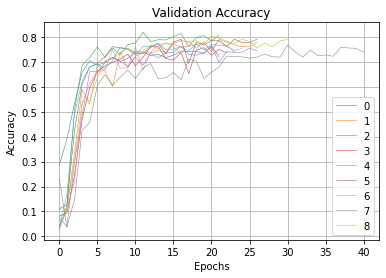

In [60]:
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
for p in validationAccuracy:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)

plt.grid()

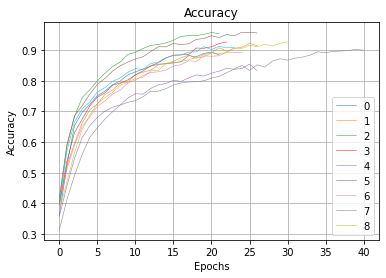

In [61]:
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
for p in accuracy:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)
plt.grid()

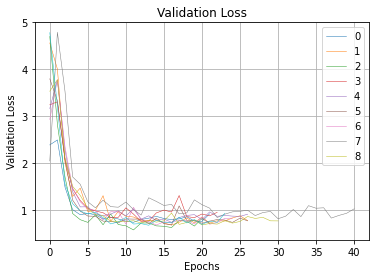

In [62]:
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
for p in validationLoss:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)
plt.grid()

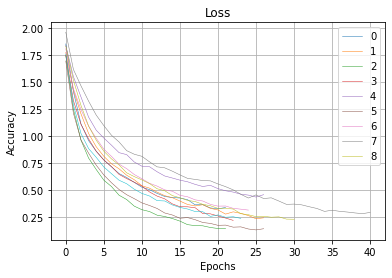

In [63]:
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
for p in loss:
    plt.legend(['0','1','2','3','4','5','6','7','8','9'])
    plt.plot(p,linewidth=0.5)
plt.grid()

## more convolutional layer

In [64]:
sgd = tf.keras.optimizers.SGD(momentum=0.9,nesterov=True)
norm = ks.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
moreConvModel = Sequential([
    #first convolutional layer
    Conv2D(8, 3,strides=1, padding='valid', activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #second convolutional layer
    Conv2D(16, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #third convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #four convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),

    #five convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    
    Flatten(),
    Dense(numberOfClasses, activation='relu',kernel_initializer=norm, bias_initializer='zeros'),
    Dense(numberOfClasses, activation='relu',kernel_initializer=norm, bias_initializer='zeros'),
    Dense(numberOfClasses, activation='softmax')
])

baseModel.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

In [65]:
moreConvModel.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 62, 62, 8)         80        
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 4, 4, 32)        

In [66]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

history=baseModel.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Epoch 1/100
160/160 [==============================] - 5s 28ms/step - loss: 0.2413 - accuracy: 0.9181 - val_loss: 1.5005 - val_accuracy: 0.6892
Epoch 2/100
160/160 [==============================] - 5s 28ms/step - loss: 0.2137 - accuracy: 0.9271 - val_loss: 1.7802 - val_accuracy: 0.6826
Epoch 3/100
160/160 [==============================] - 5s 29ms/step - loss: 0.1928 - accuracy: 0.9334 - val_loss: 1.8665 - val_accuracy: 0.6726
Epoch 4/100
160/160 [==============================] - 5s 31ms/step - loss: 0.2318 - accuracy: 0.9167 - val_loss: 2.0980 - val_accuracy: 0.6448
Epoch 5/100
160/160 [==============================] - 5s 30ms/step - loss: 0.1854 - accuracy: 0.9373 - val_loss: 1.9223 - val_accuracy: 0.6748
Epoch 6/100
160/160 [==============================] - 5s 34ms/step - loss: 0.2058 - accuracy: 0.9324 - val_loss: 2.0469 - val_accuracy: 0.6781
Epoch 7/100
160/160 [==============================] - 6s 36ms/step - loss: 0.1733 - accuracy: 0.9396 - val_loss: 2.2169 - val_accuracy:

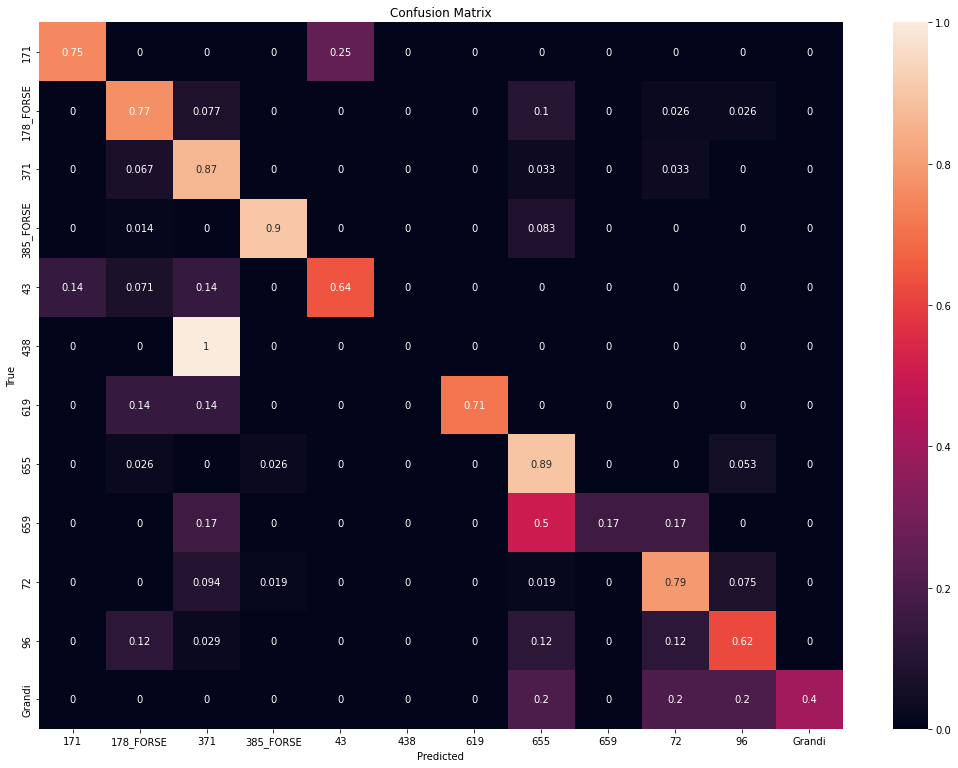

In [67]:
pltu.plotConfusionMatrix(cm, labels, "confusion_matrix_augmentation", "images_point_two/")

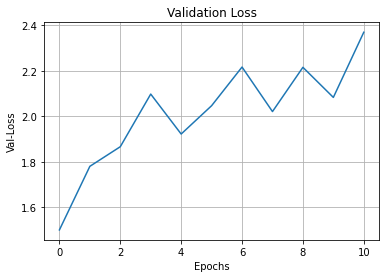

In [68]:
pltu.validationLoss(history, "images_point_two", "validation_loss_1")

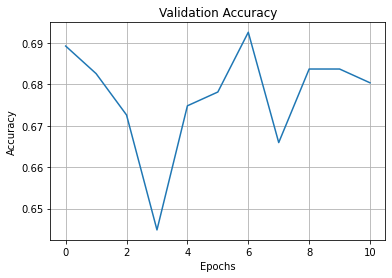

In [69]:
pltu.validationAccuracy(history, "images_point_two", "validation_acc_1")

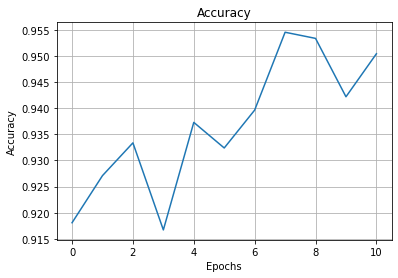

In [70]:
pltu.plottingAccuracy(history, "images_point_two", "accuracy_1")

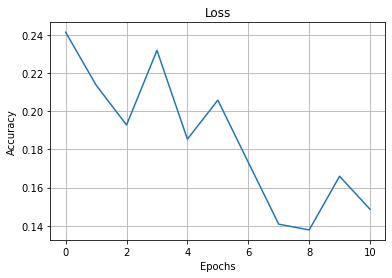

In [71]:
pltu.plottingLoss(history, "images_point_two", "loss_1")

In [72]:
print('Classification Report')
print(classification_report(yTest, yPred, target_names=labels))

Classification Report
              precision    recall  f1-score   support

         171       0.75      0.75      0.75         8
   178_FORSE       0.75      0.77      0.76        39
         371       0.62      0.87      0.72        30
   385_FORSE       0.97      0.90      0.94        72
          43       0.82      0.64      0.72        14
         438       0.00      0.00      0.00         3
         619       1.00      0.71      0.83         7
         655       0.63      0.89      0.74        38
         659       1.00      0.17      0.29         6
          72       0.84      0.79      0.82        53
          96       0.72      0.62      0.67        34
      Grandi       1.00      0.40      0.57         5

    accuracy                           0.78       309
   macro avg       0.76      0.63      0.65       309
weighted avg       0.80      0.78      0.77       309



C:\Users\39320\anaconda3\envs\notebook\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\39320\anaconda3\envs\notebook\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\39320\anaconda3\envs\notebook\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
